In [53]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
resist="Resistència "
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt
plt.style.use('classic')

In [54]:
b10041=pd.read_csv("10041.csv",sep=';',decimal=',')
b15026=pd.read_csv("15026.csv",sep=';',decimal=',')
b30026=pd.read_csv("30026.csv",sep=';',decimal=',')
b30033=pd.read_csv("30033.csv",sep=';',decimal=',')
b7526=pd.read_csv("7526.csv",sep=';',decimal=',')
files=[b10041,b15026,b30026,b30033,b7526]
for i in range(len(files)):
    files[i]["z"]=files[i]["z"]+0.01

In [55]:
def bobina(I,N,L,R,z):
#     print(I,N,L,R)
    uI=0.01
    mu0=4*np.pi*10**(-7)
    B=(mu0*I*N)/(2*L)*((z+L/2)/(np.sqrt(R**2+(z+L/2)**2))-(z-L/2)/(np.sqrt(R**2+(z-L/2)**2)))
    a=(2*I*mu0*N*R**2*(1/(4*R**2+(L+2*z)**2)**(3/2)+1/(4*R**2+(L-2*z)**2)**(3/2)))/L-(I*mu0*N*((L+2*z)/np.sqrt(4*R**2+(L+2*z)**2)-(2*z-L)/np.sqrt(4*R**2+(L-2*z)**2)))/(2*L**2)
    uL=0.001
    uB=np.sqrt(uI**2*(B/I)**2+uL**2*a**2)
    return B,uB

def analisi(data,name,I,N,L,R):
    z=np.linspace(data["z"].iloc[0],data["z"].iloc[-1],num=100)
    Be=bobina(I,N,L,R,z)
    B=Be[0]*1000
    uB1=B+Be[1]*1000
    uB2=B-Be[1]*1000
    fig1=px.scatter(x=data['z'],y=data['Camp'],template='simple_white',error_x=data["incz"],error_y=data["IncB"])
   
    fig1.update_xaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True
                    )
    fig1.update_yaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True

                    )
#     fig1.add_trace(go.Scatter(x=z,y=B,mode="markers"))
    fig1.add_trace(go.Scatter(x=z,y=uB1, fill='tonexty',mode="none",fillcolor="lightskyblue"))
    fig1.add_trace(go.Scatter(x=z,y=uB2, fill='tonexty',mode="none",fillcolor="lightskyblue"))
    fig1.update_layout(showlegend=False)

    fig1.update_layout(
    xaxis_title=r'$z\text{ (m)}^{-1}$',
    yaxis_title=r'$B\text{ (mT)}$'
    )
    fig1.write_image(f"{name}.pdf",engine="kaleido")
    fig1.show()
    

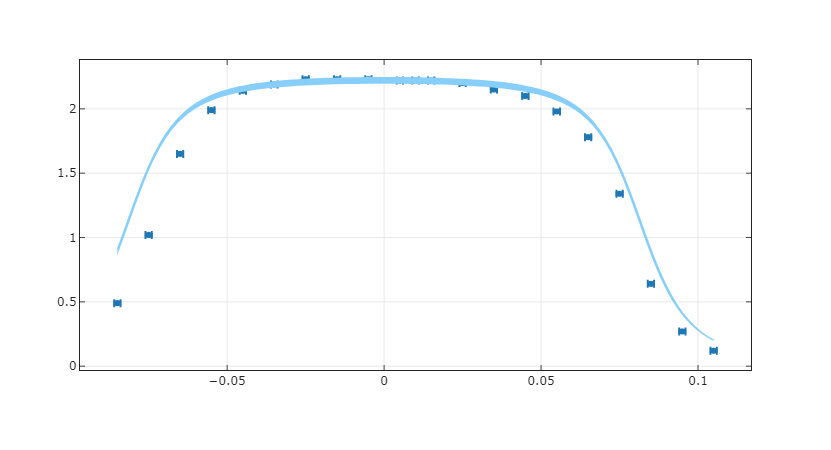

In [56]:
name=f'{b30033=}'.split('=')[0]
I=0.98
uI=0.01
N=300
L=0.163
uL=0.001
R=0.033/2
uR=0.001/2
analisi(b30033,name,I,N,L,R)
bobina(I,N,L,R,0)
L=L+0.001

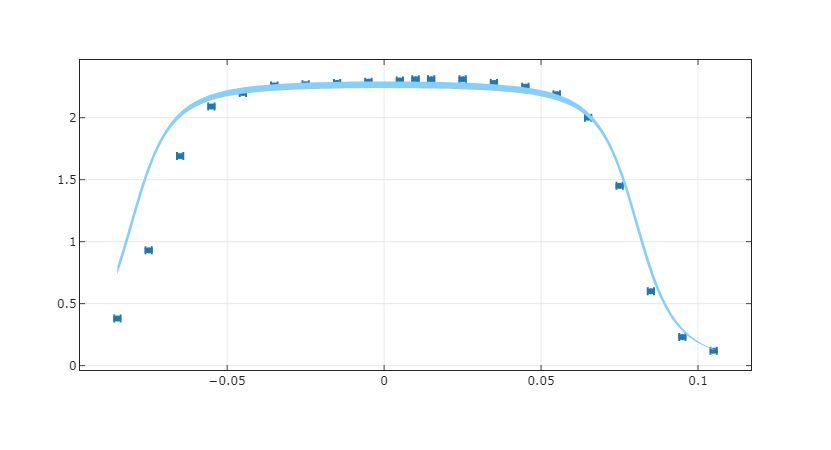

(0.0022653789869316147, 2.6877544648163613e-05)

In [57]:
name=f'{b30026=}'.split('=')[0]

I=0.98
N=300
L=0.161

R=0.026/2
analisi(b30026,name,I,N,L,R)
bobina(I,N,L,R,0)


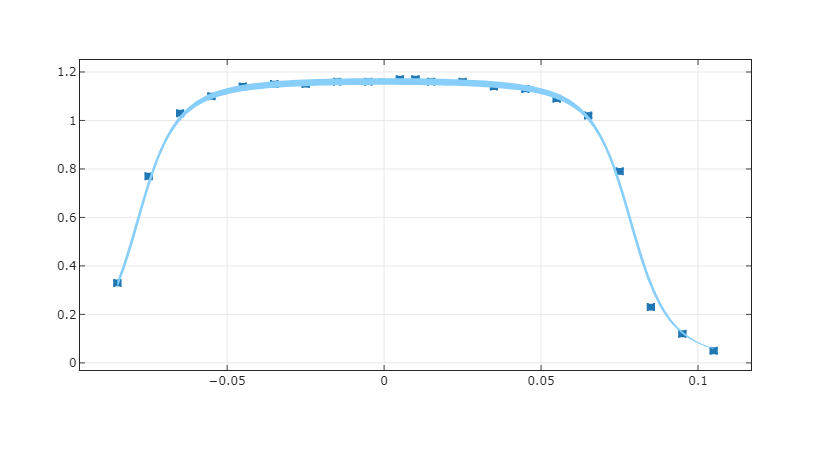

(0.0011607868291825369, 1.385942228207927e-05)

In [46]:
name=f'{b15026=}'.split('=')[0]
I=0.98
N=150
# L=0.155
L=0.157
# while L<0.17:
# print(L)
R=0.026/2
analisi(b15026,name,I,N,L,R)
bobina(I,N,L,R,0)
# L=L+0.001

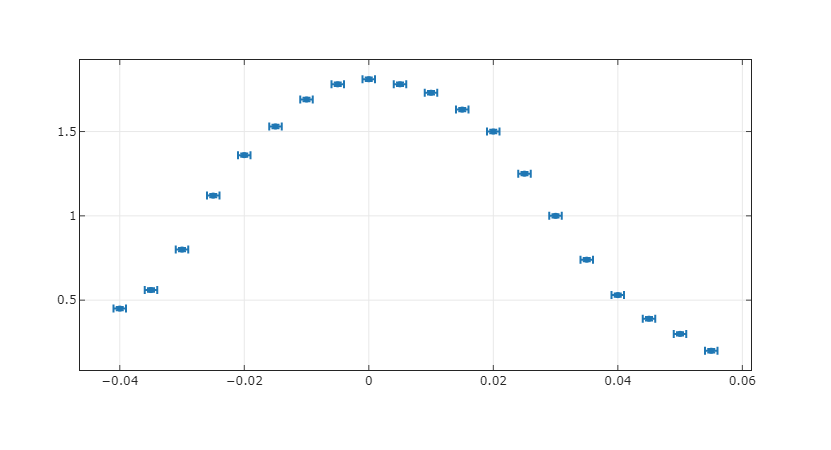

(0.0016202601694168043, 2.4403858648607772e-05)

In [47]:
name=f'{b10041=}'.split('=')[0]
I=0.98
N=100
L=0.064
R=0.041/2
analisi(b10041,name,I,N,L,R)
bobina(I,N,L,R,0)

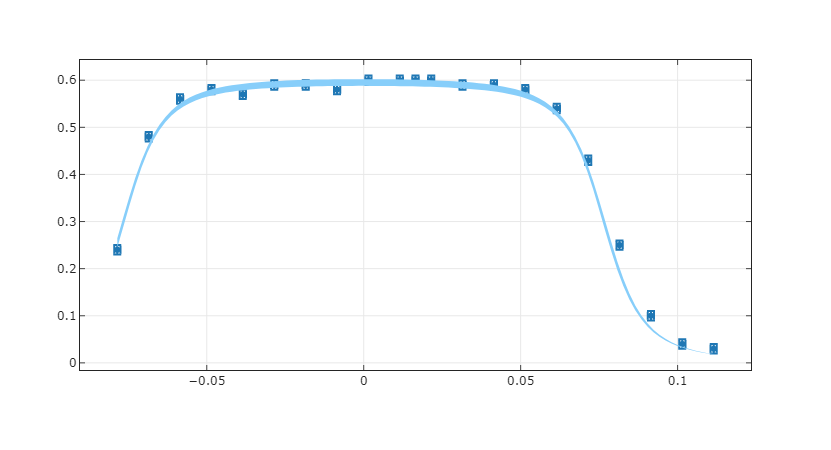

(0.0005951464916190191, 7.1535904708487e-06)

In [49]:
name=f'{b7526=}'.split('=')[0]
# ab7526=b7526
b7526=pd.read_csv("7526.csv",sep=';',decimal=',')

b7526["z"]=b7526["z"]+0.0165
I=0.98
uI=0.01
N=75
# L=0.155
L=0.153
# while L<0.17:
# print(L)
uL=0.001
R=0.026/2
uR=0.001/2
analisi(b7526,name,I,N,L,R)
bobina(I,N,L,R,0)
# L=L+0.001

In [50]:
px.add_trace?

Object `px.add_trace` not found.


# 

In [51]:
1

1

In [52]:
    a=(2*I*mu0*N*R**2*(1/(4*R**2+(L+2*z)**2)**(3/2)+1/(4*R**2+(L-2*z)**2)**(3/2)))/L-(I*mu0*N*((L+2*z)/sqrt(4*R**2+(L+2*z)**2)-(2*z-L)/sqrt(4*R**2+(L-2*z)**2)))/(2*L**2)


NameError: name 'mu0' is not defined